## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as sp

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_db = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_db.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the DataFrame.
merged_db["Mouse ID"].count

<bound method Series.count of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_db[merged_db.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate rows are", duplicate_mice, sep='\n')

Duplicate rows are
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = merged_db(self, subset=['Mouse ID', 'Timepoint'], keep=False, inplace=False)

clean_data = merged_db.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)

clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count

<bound method Series.count of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1883, dtype: object>

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_clean_df = clean_data.groupby(['Drug Regimen'])
#grouped_clean_df.head()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [10]:
data_summary = pd.DataFrame({
    "Tumor Volume Mean":grouped_clean_df['Tumor Volume (mm3)'].mean(),
    "Tumor Volume Median":grouped_clean_df['Tumor Volume (mm3)'].median(),
    "Tumor Volume Variance":grouped_clean_df['Tumor Volume (mm3)'].var(),
    "Tumor Volume Std. Deviation":grouped_clean_df['Tumor Volume (mm3)'].std(),
    "Tumor Volume SEM":grouped_clean_df['Tumor Volume (mm3)'].sem(),
    })

data_summary.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

Text(0.5, 1.0, 'Observations for Each Regimen')

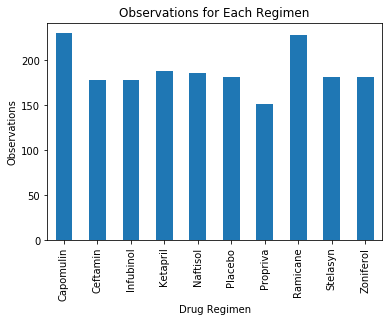

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mice_count = grouped_clean_df['Mouse ID'].count()
mice_count.plot(kind="bar")
plt.ylabel("Observations")
plt.title("Observations for Each Regimen")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

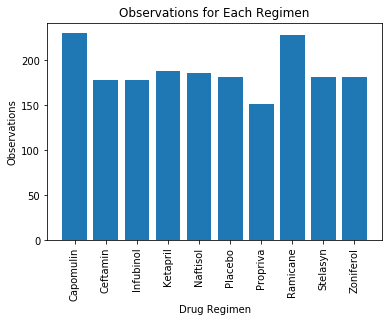

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
regimen = mice_count.index.to_list()
plt.bar(regimen, mice_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Observations")
plt.title("Observations for Each Regimen")
plt.xticks(rotation='vertical')

## Pie Plots

Text(0, 0.5, 'Distribution of Female vs. Male')

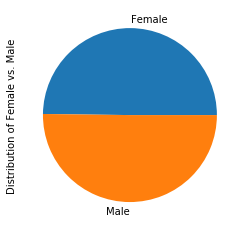

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#gender_group = grouped_clean_df.groupby(["Sex"])
gender_group= clean_data.groupby(["Sex"])
gender_data = gender_group['Mouse ID'].unique()
gender_map = gender_data.map(len)
gender_pie = gender_map.plot.pie(y='Sex')
plt.ylabel('Distribution of Female vs. Male')

Text(0, 0.5, 'Distribution of Female vs. Male')

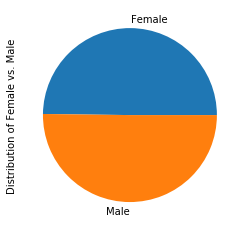

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_map, labels=["Female","Male"])
plt.ylabel('Distribution of Female vs. Male')

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen_list = mice_count.index.to_list()
best_regimen = ['Capomulin','Ceftamin','Infubinol','Ramicane']
mousereg_group = clean_data.groupby(["Drug Regimen","Mouse ID"])


regi_mice = mousereg_group.last()
best_regimens = [b for b in best_regimen]
reg_list = [regi_mice['Tumor Volume (mm3)'][best_regimens]]
regimen_df = pd.DataFrame(reg_list).transpose().reset_index()
regimen_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


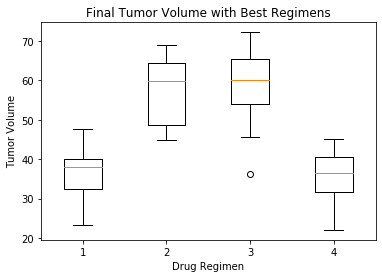

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume = [regi_output_df.loc[regi_output_df['Drug Regimen'] == best_regimens[i], 'Tumor Volume (mm3)'] for i in range(4)]

for i in range(4):
    quartiles = tumor_volume[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume with Best Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

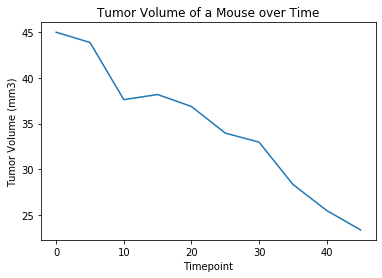

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin_vol = (clean_data['Tumor Volume (mm3)'][10:20].to_list())
mouse_capomulin_time = (clean_data['Timepoint'][10:20].to_list())
plt.plot(mouse_capomulin_time, mouse_capomulin_vol)
plt.title("Tumor Volume of a Mouse over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Mouse Weights against Average Tumor Volumes')

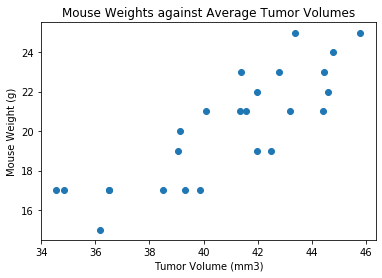

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice = clean_data.groupby(["Mouse ID"])

mouse_new_list = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_new_list_id = mouse_new_list['Mouse ID'].unique()
mouse_new_list_avg_vol = pd.Series([mice.get_group(m)['Tumor Volume (mm3)'].mean() for m in mouse_new_list_id])
mouse_new_list_weight = pd.Series([mice.get_group(m)['Weight (g)'].sum()/mice.get_group(m)['Weight (g)'].count() for m in mouse_new_list_id])
plt.scatter(mouse_new_list_avg_vol, mouse_new_list_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Weights against Average Tumor Volumes")

## Correlation and Regression

The r-value between mouse weight and tumor volume is 0.84.


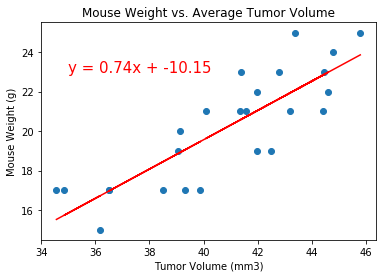

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_new_list_avg_vol
y_values = mouse_new_list_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

slope, intercept, r_value, p_value, std_err = sp.linregress(x_values, y_values)
print(f"The r-value between mouse weight and tumor volume is {round(r_value,2)}.")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,23),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()